# Chapter 3 Thoughts

Linear Regression means model is linear in variable, not necessarily in inputs

Examples
- Polynomials (Vandermonde)
- Basis Functions
- Trig (Fourier Series)

In [17]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
from scipy.linalg import lstsq
from scipy.stats import norm


Example of linear basis functions where each ith basis function is normally distributed around N( 0, i)

In this way impose priors of our variables as normally distributed functions, i.e. Bayesian Linear regression


In [129]:
def gaussian_basis(x, mu, var):
    return np.exp(- (np.linalg.norm(x-mu)**2)/2*var)


x = np.linspace(-3,3,1000)
t=norm.pdf(x)+norm.pdf(x,loc=-1,scale=2)+norm.pdf(x,scale=10)


In [130]:
M = 5
Phi = np.ones((t.shape[0], M))
for m in range(M-1):
    Phi[:, m+1] = np.vectorize(gaussian_basis)(x, 0,(m+1))

In [131]:
p, res, rnk, s = lstsq(Phi, t)
print("LS Solution is", np.round(p))
print("Sum of Squared Residuals is", res)
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [ 0.  1. -1.  1. -1.]
Sum of Squared Residuals is 1.9631923511680742
Rank of LS matrix is 5
Singular Values are [38.79109423 17.38016968  3.81144568  0.61181696  0.06265114]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

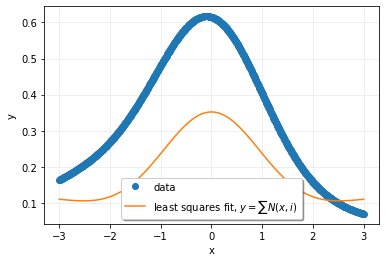

In [133]:
plt.plot(x, t, 'o', label='data')
xx = np.linspace(-3, 3, 101)
yy = p[0] +sum([p[i]*norm.pdf(xx,scale=i) for i in range (1,M)])

plt.plot(xx, yy, label='least squares fit, $y = \sum N(x,i)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()